# Testes de Normalidade

In [1]:
import numpy as np
import pandas as pd

In [2]:
enem_sp = pd.read_csv('enem_2019_tratado.csv', sep=',', encoding='iso-8859-1')

In [4]:
enem_sp.tail()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
499935,"1,90E+11",São Paulo,18,F,1,parda,1,1,não_respondeu,NaN,...,479.1,Espanhol,1.0,100.0,120.0,120.0,140.0,100.0,580.0,Sim
499936,"1,90E+11",São Paulo,17,F,1,preta,1,2,pública,35925457.0,...,43.2,Espanhol,1.0,80.0,120.0,140.0,120.0,100.0,560.0,Sim
499937,"1,90E+11",São Paulo,17,F,1,parda,1,2,pública,35001156.0,...,487.3,Inglês,1.0,120.0,80.0,60.0,120.0,0.0,380.0,Sim
499938,"1,90E+11",São Paulo,17,M,1,parda,1,2,pública,NaN,...,401.1,Inglês,1.0,160.0,120.0,160.0,140.0,160.0,740.0,Não
499939,"1,90E+11",Araras,18,F,1,branca,1,2,pública,35019926.0,...,559.5,Inglês,1.0,120.0,120.0,120.0,120.0,140.0,620.0,Sim


In [5]:
# Trabalhando com a cidade de Araras
enem_araras = enem_sp.loc[enem_sp.NO_MUNICIPIO_RESIDENCIA == 'Araras']

In [6]:
enem_araras.shape

(1088, 28)

In [7]:
enem_araras.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
278,"1,90E+11",Araras,20,M,1,parda,1,1,não_respondeu,NaN,...,773.7,Inglês,1.0,160.0,120.0,160.0,180.0,160.0,780.0,Sim
336,"1,90E+11",Araras,18,F,1,branca,1,2,privada,35801793.0,...,793.1,Inglês,1.0,180.0,200.0,200.0,200.0,180.0,960.0,Sim
569,"1,90E+11",Araras,30,F,1,branca,1,1,não_respondeu,NaN,...,408.7,Espanhol,1.0,120.0,120.0,120.0,100.0,120.0,580.0,Sim
626,"1,90E+11",Araras,27,F,1,branca,1,1,não_respondeu,NaN,...,693.3,Inglês,1.0,160.0,120.0,140.0,140.0,140.0,700.0,Sim
795,"1,90E+11",Araras,18,F,1,preta,1,1,não_respondeu,NaN,...,674.2,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


Existem diferentes testes de normalidade:
 - Testes de normalidade numéricos
 - Testes Gráficos

Sendo:

Shapiro-Wilk (limite de 5000 amostras)

Kolmogorov_Smirnov

Histograma 

QQplot

### Histograma

In [8]:
import seaborn as sns

Text(0.5, 1.0, 'Distribuição de notas de Redação')

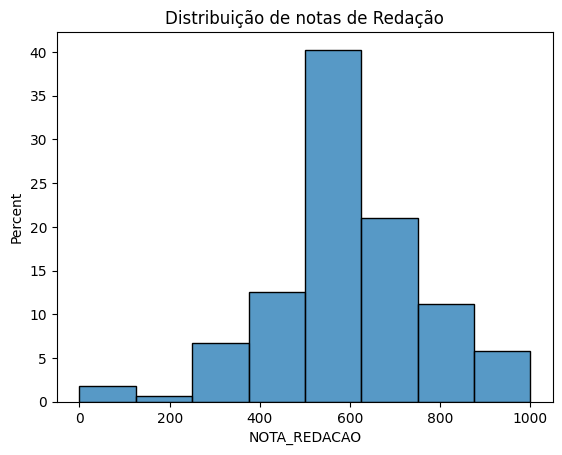

In [10]:
grafico = sns.histplot(enem_sp, x = "NOTA_REDACAO", bins=8, stat='percent')
grafico.set_title('Distribuição de notas de Redação')

Text(0.5, 1.0, 'Distribuição de notas de Redação')

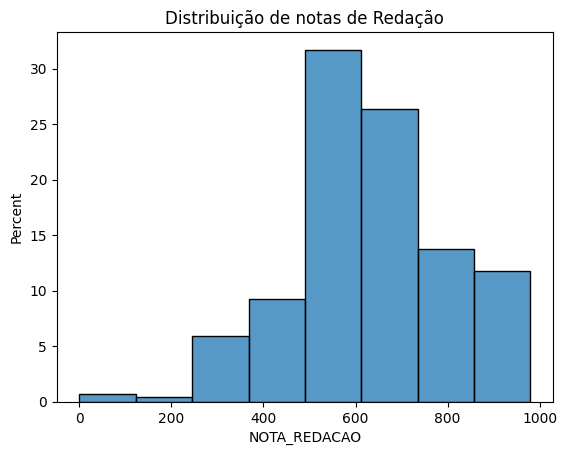

In [11]:
grafico = sns.histplot(enem_araras, x = "NOTA_REDACAO", bins=8, stat='percent')
grafico.set_title('Distribuição de notas de Redação')

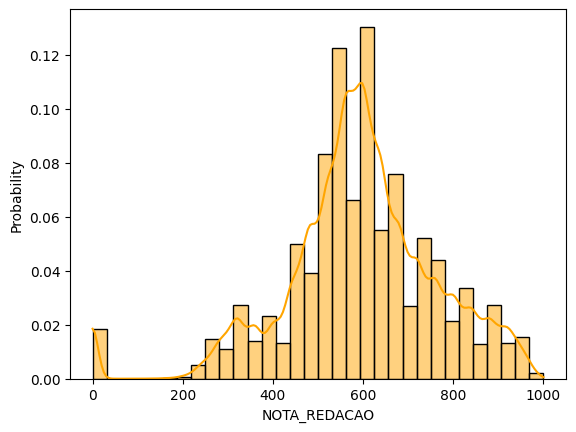

In [12]:
sns.histplot(enem_sp, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

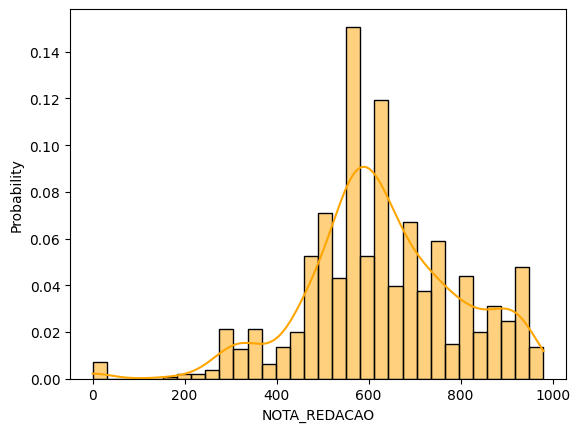

In [13]:
sns.histplot(enem_araras, x='NOTA_REDACAO', bins=32, color="orange", kde=True, stat="probability");

## QQPLOT

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

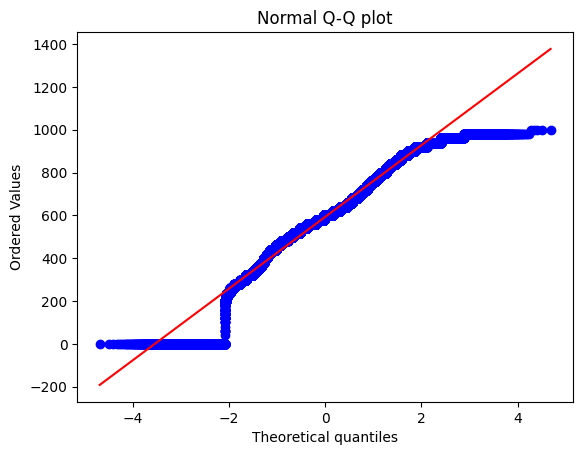

In [15]:
stats.probplot(enem_sp['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

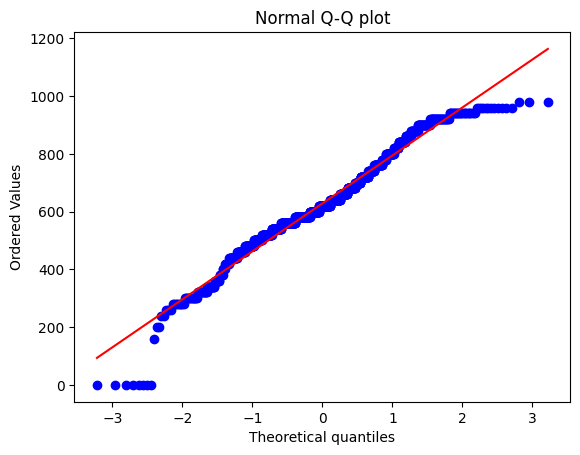

In [16]:
stats.probplot(enem_araras['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

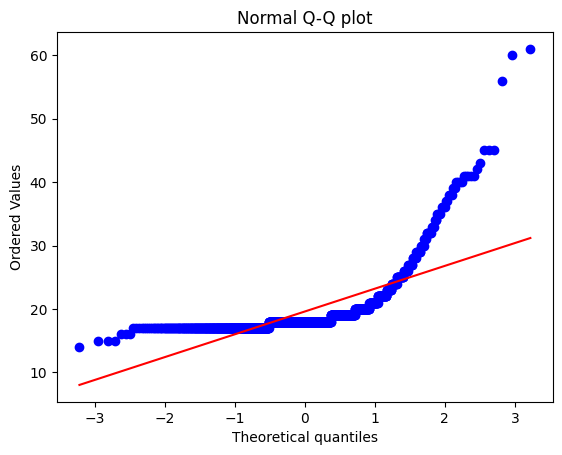

In [17]:
stats.probplot(enem_araras['IDADE'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Teste de Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

QUANDO p > 0,05 (distribuição normal).

In [18]:
stats.shapiro(enem_sp.NOTA_REDACAO)

c:\Users\Emanuelle\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 499940.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.963339132223719), pvalue=np.float64(4.0266750341791595e-114))

O teste de Shapiro_Wilk não se aplica a dados maiores que 5000.

In [19]:
stats.shapiro(enem_araras.NOTA_REDACAO)

ShapiroResult(statistic=np.float64(0.9744179512423737), pvalue=np.float64(6.178217852102266e-13))

### Teste Lilliefors (Kolmogorov-Smirnov)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
statsmodels.stats.diagnostic.lilliefors(enem_sp.NOTA_REDACAO, dist = 'norm')